In [1]:
# HELPER FUNCTIONS FOR POLYNOMIAL REGRESSION

import numpy
from sklearn.preprocessing import PolynomialFeatures

# This a helper function that will help you plot the estimated polynomial regression along with the true values & true function
# We will use this later

def plot_functions(d, est, ax, df, alpha, xvalid, yvalid, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", ms=5, alpha=0.7,color = 'darkblue')
    ax.plot(xvalid, yvalid, 's', label="validation", ms=5, alpha=0.8,color ='#007D66')
    transx=numpy.arange(0,1.1,0.01)
    transX = PolynomialFeatures(d).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),linewidth=3, alpha=0.8, label="alpha = %s" % str(alpha),color='#FF2F92')

    # This is just aesthetics
    ax.set_ylim((1, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')
    


# This helper function will help you plot the magnitude of the coefficients of the polynomial regression
# The values will help you determine which powers of the feature are most influential

def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.bar(range(len(coef)),numpy.abs(coef),label =f'alpha = {alpha}',color='#9FC131FF',alpha=0.5,edgecolor='k')
    ax.set_yscale('log')
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# These are custom functions made to help you visualise your results
from helper import plot_functions
from helper import plot_coefficients

In [3]:
df = pd.read_csv('polynomial50.csv')
df.head()

,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


In [4]:
# Assign the values of the 'x' column as the predictor

x = df[['x']].values

# Assign the values of the 'y' column as the response

y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f 

f = df['f'].values

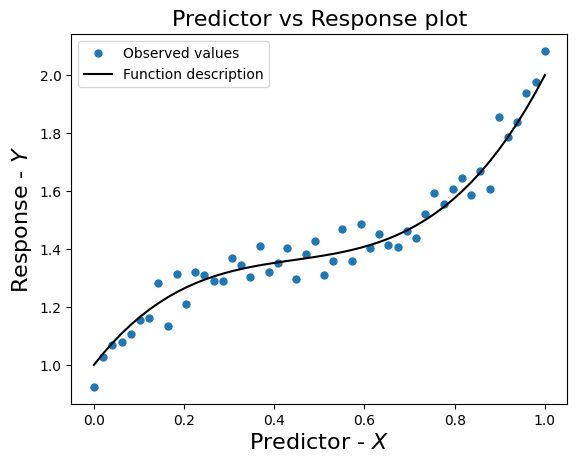

In [5]:
# Visualise the distribution of the x, y values & also the value of the true function f

fig, ax = plt.subplots()

# Plot x vs y values

ax.plot(x, y, '.', label = 'Observed values',markersize=10)

# Plot x vs true function value

ax.plot(x, f, 'k-', label = 'Function description')

# The code below is to annotate your plot

ax.legend(loc = 'best');

ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16);


In [6]:
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8,random_state=109)

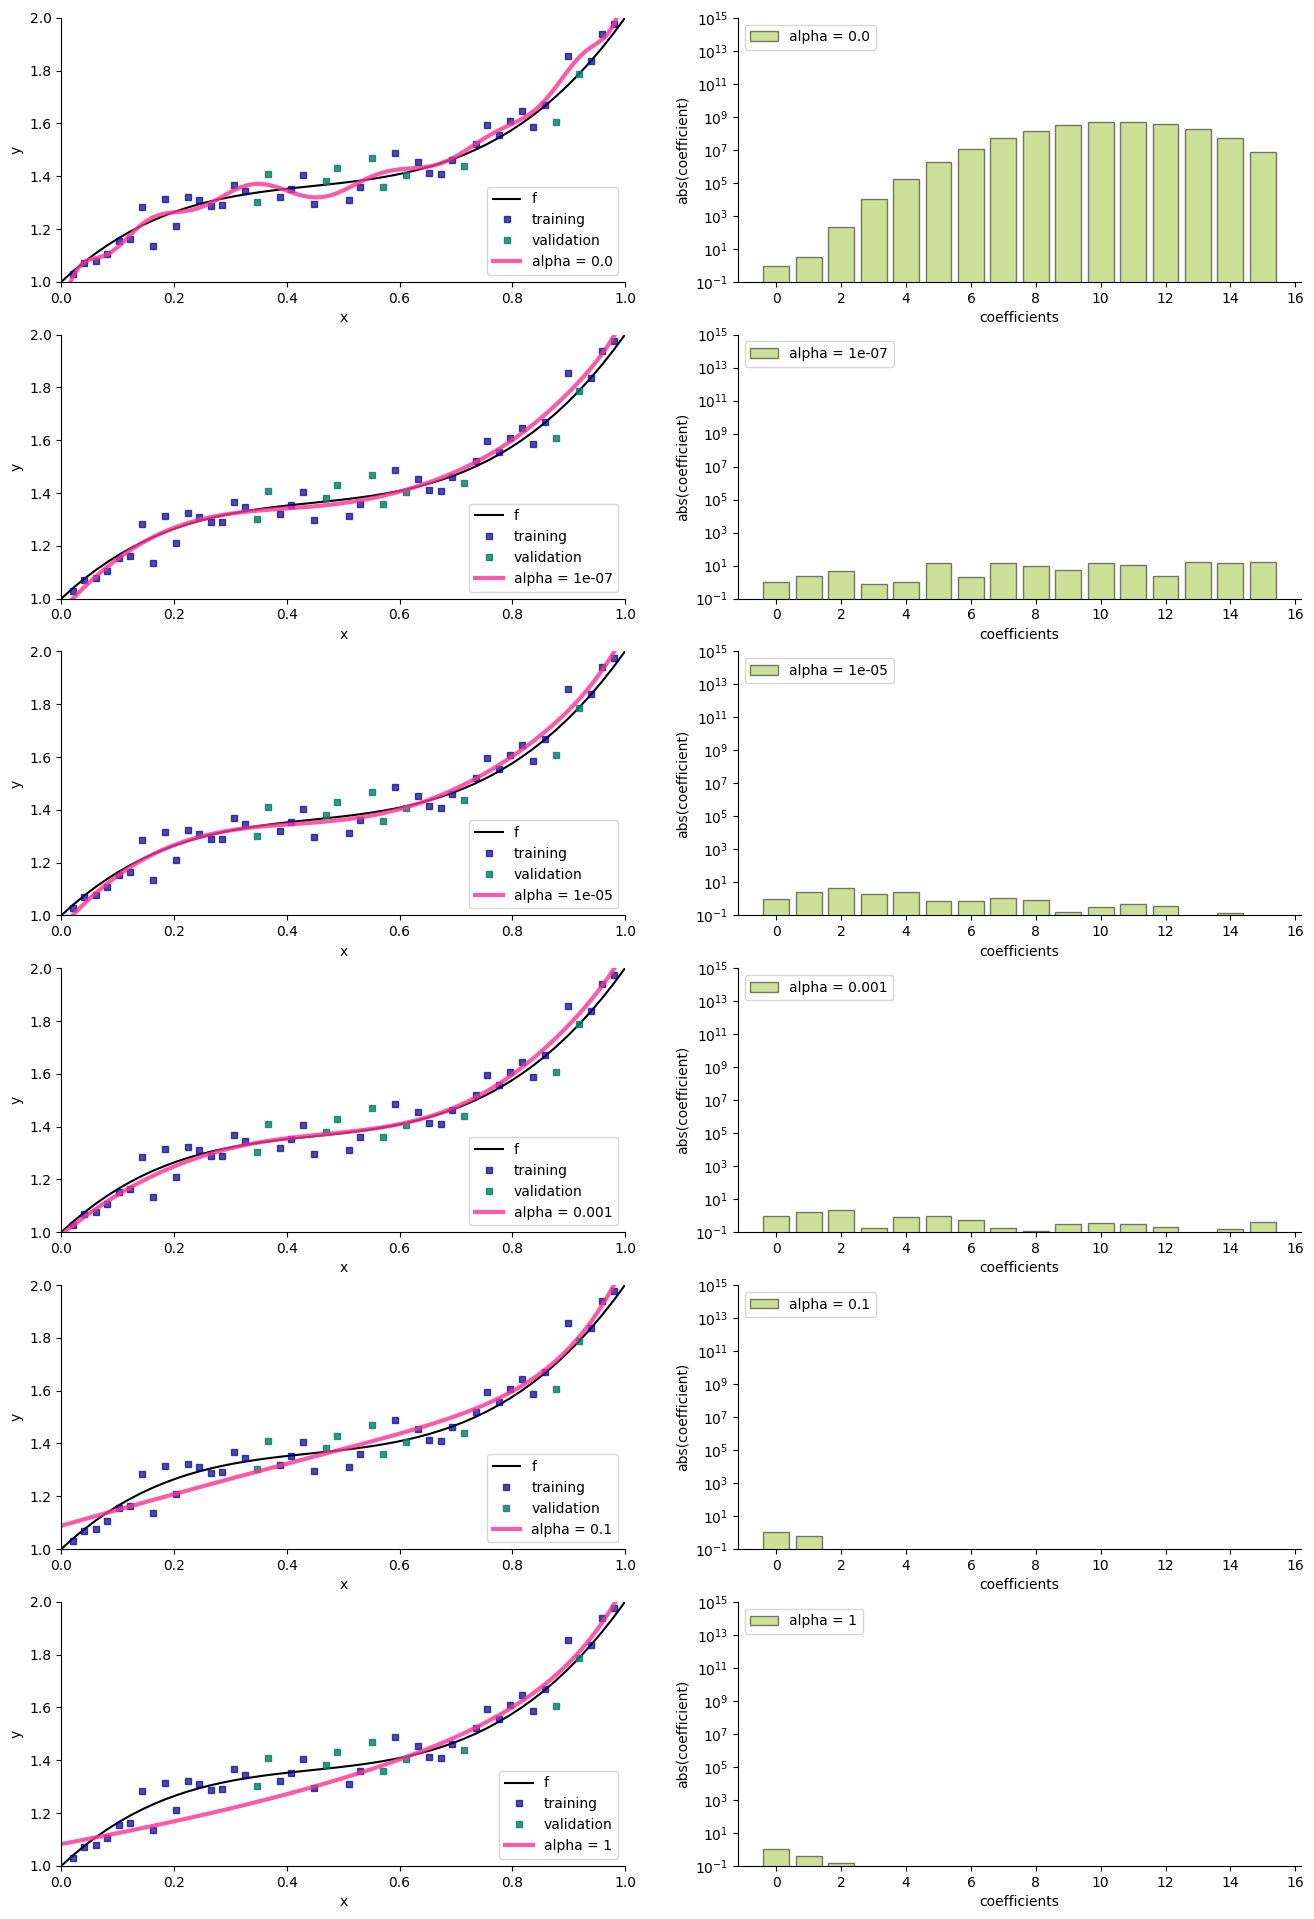

In [7]:
### edTest(test_mse) ### 

fig, rows = plt.subplots(6, 2, figsize=(16, 24))

# Select the degree for polynomial features

degree = 15

# List of hyper-parameter values 

alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]

# Create two lists for training and validation error

training_error, validation_error = [],[]

# Compute the polynomial features train and validation sets

poly_features = PolynomialFeatures(degree=degree)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_val = poly_features.fit_transform(x_val)

for i, alpha in enumerate(alphas):
    l,r=rows[i]
    
    # For each i, fit a ridge regression on training set
    
    ridge_reg = Ridge(fit_intercept=False, alpha=alpha)
    ridge_reg.fit(x_poly_train, y_train)
    
    # Predict on the validation set 
    
    y_train_pred = ridge_reg.predict(x_poly_train)
    y_val_pred = ridge_reg.predict(x_poly_val)
    
    # Compute the training and validation errors
    
    mse_train = mean_squared_error(y_train, y_train_pred) 
    mse_val = mean_squared_error(y_val, y_val_pred)
    
    # Add that value to the list 
    training_error.append(mse_train)
    validation_error.append(mse_val)
    
    # Use helper functions plot_functions & plot_coefficients to visualise the plots
    
    plot_functions(degree, ridge_reg, l, df, alpha, x_val, y_val, x_train, y_train)
    plot_coefficients(ridge_reg, r, alpha)

sns.despine()

In [8]:
### edTest(test_hyper) ###
# Find the best value of hyper parameter, which gives the least error on the validdata

best_parameter = alphas[np.argmin(validation_error)]

print(f'The best hyper parameter value, alpha = {best_parameter}')


The best hyper parameter value, alpha = 0.001


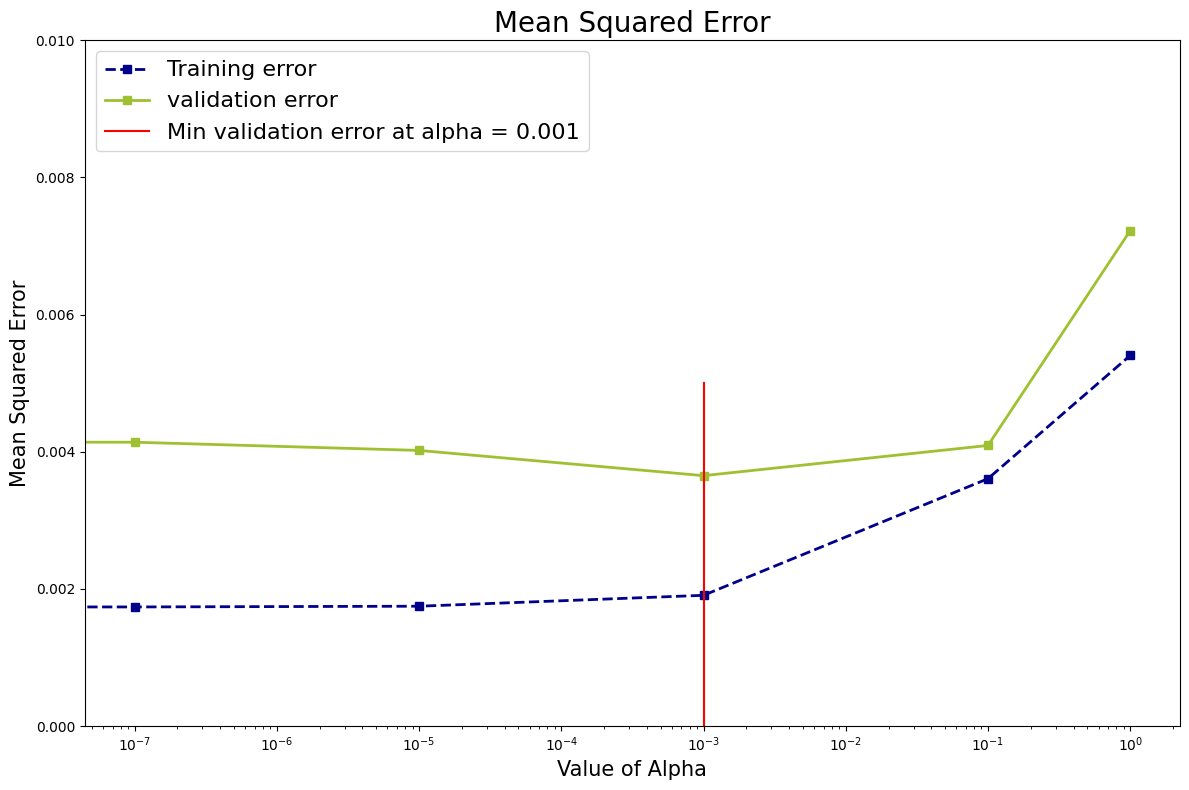

In [9]:
# Now make the MSE polots
# Plot the errors as a function of increasing d value to visualise the training and validation errors

fig, ax = plt.subplots(figsize = (12,8))

# Plot the training errors for each alpha value

ax.plot(alphas, training_error, 's--', label = 'Training error',color = 'Darkblue',linewidth=2)

# Plot the validation errors for each alpha value

ax.plot(alphas, validation_error, 's-', label = 'validation error',color ='#9FC131FF',linewidth=2 )

# Draw a vertical line at the best parameter

ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

ax.set_xlabel('Value of Alpha',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.set_ylim([0,0.010])
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Mean Squared Error',fontsize=20)
ax.set_xscale('log')
plt.tight_layout()